# ⛳ [Introduction to data structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro)

We'll start a quick non-comprehensive overview of the fundamental data structures in pandas to get you started. The fundamental behavior about data types, indexing, and axis labeling / alignment apply across all of the objects. To get started, import NumPy and load pandas into your namespace:

In [ ]:
import numpy as np
import pandas as pd

Here is a basic tenet to keep in mind: **data alignmentis intrinsic.** The link between labels and data will not be broken unless done so explicityly by you.

We'll give a brief intro to the data structures, then consider all of the broad categories of functionality and methods in separate sections.

# Series
`Series` is a cone-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. The basic method to creae a Series is to call:

```
s = pd.Series(data, index=index)
```

Here, `data` can be many different things:
- a Python dict
- an ndarray
- a scalar value (like 5)

The passed **index** is a list of axis labels. Thus, this separates into a few cases depending on what **data is:**

**From ndarray**

If `data` is an ndarray, **index** must be the same length as **data.** If no index is passed, one will b created having values [0, ..., len(Data -1].

In [ ]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.837132
b   -2.772131
c    0.002514
d   -0.669413
e    1.738355
dtype: float64

In [ ]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
pd.Series(np.random.randn(5))

0   -0.422302
1    0.681613
2   -1.433621
3    0.821725
4   -0.802533
dtype: float64

> ## ✨ Note
pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, and exception will be raised that time. The reason for being lazy is nearly all performance-based (there are many instances in computations, like parts of GroupBy, where the index is not used).  
고유하지 않은 인덱스값 제공 이유 -> groupby 메소드처럼 쓰이지 않는 경우 종종 있기 때문

### **From dict**
Series can be instatiated from dicts:

In [ ]:
d = {"b": 1, "a": 0, "c": 2}
d

{'a': 0, 'b': 1, 'c': 2}

In [ ]:
pd.Series(d)

b    1
a    0
c    2
dtype: int64

> ## ✨ Note
When the data is a dict, and an index is not passed, the `Series` index will be ordered by the dict's insertion order, if you're using Python version >= 3.6 and pandas version >= 0.23.  
>
> If you're using Python < 3.6 or pandas < 0.23, and an index is not passed, the `Series` index will be the lexically 사전적으로 정의된 ordered list of dict keys. 

In the example above, if you were on a Python version lower than 3.6 or a pandas version lower than 0.23, the `Series` would be ordered by the lexical order of the dict keys (i.e ['a', 'b', 'c'] rather than ['b', 'a', 'c']). 결국 알파벳 순서라는 뜻. 

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.


In [ ]:
d = {"a": 0.0, "b": 1.0, "c":2.0}

In [ ]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [ ]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

> ## ✨ Note
NaN (not a number) is the standard missing data marker used in pandas.

### From scalar value
If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of **index**


In [ ]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

# Series is ndarray-like
`Series` acts very similarly to a `ndarray`, and is a valid argument to most NumPy functions. However, operations such as  slicing will also slice the index. 

In [ ]:
s[0]

-0.8371320739151837

In [ ]:
s[:3]

a   -0.837132
b   -2.772131
c    0.002514
dtype: float64

In [ ]:
s[s > s.median()]

c    0.002514
e    1.738355
dtype: float64

In [ ]:
s[[4,3,1]]

e    1.738355
d   -0.669413
b   -2.772131
dtype: float64

In [ ]:
np.exp(s)  # Calculate the exponential of all elements in the input array. 밑인 자연상수e인 지수함수 (e^s)를 반환

a    0.432950
b    0.062529
c    1.002517
d    0.512009
e    5.687977
dtype: float64

> ## ✨ Note
We will address array-based indexing like s[[4, 3, 1]] in section on indexing.

Like a NumPy array, a pandas Series has a `dtype`.

In [ ]:
s.dtype

dtype('float64')

This is often a NumPy dtype. However, pandas and 3rd-party libraries extend NumPy's type system in a few places, in which case the dtype would be an `ExtensionDtype`. Some examples within pandas are [Categorical data](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) and[ Nullable integer data type](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html#integer-na). See [dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes) for more.

If you need the actual array backing a `Series`, use [Series.array](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.array.html#pandas.Series.array). 시리즈를 배열로 뽑을 때 사용

In [ ]:
s

a   -0.837132
b   -2.772131
c    0.002514
d   -0.669413
e    1.738355
dtype: float64

In [ ]:
s.array

<PandasArray>
[  -0.8371320739151837,   -2.7721306450813987, 0.0025142810700543097,
   -0.6694129281764124,     1.738354678975746]
Length: 5, dtype: float64

Accessing the array can be useful when youu need to do some operation without the index (to disable [automatic alignment](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro-alignment), for example). 

Series.array will always be an ExtensionArray. Briefly, an ExtensionArray is a thin wrapper around one or more concrete arrays like a numpy.ndarray. pandas knows how to take an `ExtensionArray` and store it in a `Series` or a column of a `DataFrame`. 

While Series is ndarray-like, if you need an actual ndarray, then use [Series.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy).

In [ ]:
s.to_numpy()  # A NumPy ndarray representing the values in this Series or Index.

array([-8.37132074e-01, -2.77213065e+00,  2.51428107e-03, -6.69412928e-01,
        1.73835468e+00])

Even if the Series is backed by a ExtensionArray, `Series.to_numpy()` will return a NumPy ndarray.

# Series is dict-like
A Series is like a fixed-size dict in that you can get and set values by index label:

In [ ]:
s["a"]

-0.8371320739151837

In [ ]:
s["e"]

1.738354678975746

In [ ]:
s["e"] = 12.0
s

a    -0.837132
b    -2.772131
c     0.002514
d    -0.669413
e    12.000000
dtype: float64

In [ ]:
"e" in s

True

In [ ]:
"f" in s

False

If a label is not contained, an exception is raised:

In [ ]:
# s["f"]

Using the `get` method, a missing label will return None or specified default:

In [ ]:
s.get("f")

In [ ]:
s.get("f", np.nan)

nan

See also the [section on attribute access](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-attribute-access).

In [ ]:
sa = pd.Series([1,2, 3,], index=list('abc'))
sa.b

2

In [ ]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df 

,A,B,C,D
2000-01-01,-1.203535,0.392931,0.850750,1.316568
2000-01-02,-0.410907,0.685139,0.585223,-0.309206
2000-01-03,0.015353,-1.127065,0.465707,1.055207
2000-01-04,-1.055739,0.251119,-0.387387,2.346410
2000-01-05,0.244438,-0.151427,-1.048997,0.866870
2000-01-06,1.032447,-0.752078,0.985758,1.400879
2000-01-07,0.605920,-0.278703,-1.533238,0.608052
2000-01-08,-0.169155,-1.603029,1.346907,1.629327


In [ ]:
dfa = df.copy()
dfa.A

2000-01-01   -1.203535
2000-01-02   -0.410907
2000-01-03    0.015353
2000-01-04   -1.055739
2000-01-05    0.244438
2000-01-06    1.032447
2000-01-07    0.605920
2000-01-08   -0.169155
Freq: D, Name: A, dtype: float64

In [ ]:
dfa.A = list(range(len(dfa.index)))
dfa.A

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
2000-01-08    7
Freq: D, Name: A, dtype: int64

# Vectorized operations and label alignment with Series
When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray. 

In [ ]:
s + s

a    -1.674264
b    -5.544261
c     0.005029
d    -1.338826
e    24.000000
dtype: float64

In [ ]:
s * 2

a    -1.674264
b    -5.544261
c     0.005029
d    -1.338826
e    24.000000
dtype: float64

In [ ]:
np.exp(s)

a         0.432950
b         0.062529
c         1.002517
d         0.512009
e    162754.791419
dtype: float64

A key difference between sEries and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consdieration to whether the Series involved have the same labels.

In [ ]:
s[1:] + s[:-1]

a         NaN
b   -5.544261
c    0.005029
d   -1.338826
e         NaN
dtype: float64

The result of an operation between unaligned Series will have the **union** of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing `NaN`. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data. 

> ## ✨ Note
In general, we chose to make the default result of operations between differently indexed objects yield(출력하다) the **union** of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels **dropna** function.

# Name attribute
Series can also have a `name` attribute:

In [ ]:
s = pd.Series(np.random.randn(5), name="something")
s

0   -1.502690
1    0.494997
2    0.499513
3   -0.436540
4    1.391866
Name: something, dtype: float64

In [ ]:
s.name

'something'

The series `name` will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see below.

You can rename a Series with the [pandas.Series.rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rename.html#pandas.Series.rename) method.

In [ ]:
s2 = s.rename("name changed")
s2.name

'name changed'

Note that `s` and `s2` refer to different objects.

# DataFrame
**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A `Series`
- Another `DataFrame`

Along with the data, you can optionally pass **index** (row labels) and **colums** (column labels) argunments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index. 
If axis labels are not passed, they will be constructed from the input data based on common sense rules. 

> ## ✨ Note
When the data is a dict, and `columns` is not specified, the `DataFrame` columns will be oredered by the dict's insertion order, if you are using Python version >= 3.6 and pandas >= 0.23.
If you are using Python < 3.6 or pandas < 0.23, and `columns` is not specified, the `DataFrame` columns will be the lexically ordered list of dict keys.

#From dict of Series of dicts
The resulting **index** will be the **union** of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys. 


In [ ]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [ ]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [ ]:
pd.DataFrame(d, index=["d","b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


The row and column labels can be accessed respectively by accessing the **index** and **columns** attributes:

> ## ✨ Note
When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.

In [ ]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
df.columns

Index(['one', 'two'], dtype='object')

#From dict of ndarrays / lists
The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.

In [ ]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


#From structured or record array 
The case is handled idenically to a dict of arrays.

In [ ]:
data = np.zeros((2,), dtype=[("A", "i4"),("B","f4"),("C","a10")])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [ ]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
data[:]

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [ ]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [ ]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [ ]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


## ✨ Note 
DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

#From a list of dicts

In [ ]:
data2 = [{"a": 1, "b":2}, {"a": 5, "b": 10,"c":20}]
data2

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [ ]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [ ]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [ ]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


#From a dict of tuples
You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [ ]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"):1, ("A", "C"):2},
        ("a", "a"): {("A", "C"):1, ("A", "B"):4},
        ("a", "c"): {("A", "B"):1, ("A", "C"):6},
        ("b", "a"): {("A", "C"):1, ("A", "B"):8},
        ("b", "b"): {("A", "D"):1, ("A", "B"):10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  1.0  8.0  10.0
  C  2.0  1.0  6.0  1.0   NaN
  D  NaN  NaN  NaN  NaN   1.0

#From a Series
The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

#From a list of namedtuples
The field names of the first `namedtuple` in the list determine the columns of the `DataFrame`. The remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the `DataFrame`. If any of those tuples is horter than the first `namedtuple` then the later columns in the corresponding row are marked as missing values. If any are longer than the first `namedtuple`, a `ValueError` is raised. 

In [ ]:
from collections import namedtuple

Point = namedtuple("Point", "x y")

In [ ]:
pd.DataFrame([Point(0,0), Point(0,3), Point(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


In [ ]:
Point3D = namedtuple("Point3D", "x y z")

In [ ]:
pd.DataFrame([Point3D(0,0,0), Point3D(0,3,5), Point(2,3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


## 해보니까 ValueError 아니고 TypeError 나오는데 ? 
-> 에러 관련 블로그 포스팅 한번 필요 !

In [ ]:
# pd.DataFrame([Point3D(0,0,0), Point3D(0,3,5), Point(2,3), Point3D(2,3,4,5)])

#From a list of dataclasses
Data Classes as introduced in [PEP557](https://peps.python.org/pep-0557/), can be passed into the DataFrame constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries.

Please be aware, that all values in the list should be dataclasses, mixing types in the list would result in a TypeError.

In [ ]:
from dataclasses import make_dataclass

Point = make_dataclass("Point", [("x", int), ("y", int)])

In [ ]:
pd.DataFrame([Point(0,0), Point(0,3), Point(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


### Missing data
Much more will be said on this topic in the [Missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data) section. To construct a DataFrame with missing data, we use `np.nan` to represent missing values. Alternatively, you may pass a `numpy.MaskedArray` as the data argument to the DataFrame constructor, and its masked entries will be considered missing.

#Alternate constructors
### DataFrame.from_dict
'DataFrame.from_dict' takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the `DataFrame` constructor except for the `orient` parameter which is `'columns'`by default, but which can be set to `'index'` in order to use the dict keys as row labels.

In [ ]:
pd.DataFrame.from_dict(dict([("A", [1,2,3]), ("B", [4,5,6])]))

,A,B
0,1,4
1,2,5
2,3,6


If you pass `orient='index'`, the keys will be the row labels. In this case, you can also pass the desired column names:

In [ ]:
pd.DataFrame.from_dict(
    dict([("A", [1,2,3]), ("B", [4,5,6])]),
    orient="index",
    columns=["one", "two", "three"],   # 맨 마지막에 comma 있어도 되고 없어도 됨!! 알아서 해줌
)

,one,two,three
A,1,2,3
B,4,5,6


### DataFrame.from_records
`DataFrame.from_records` takes a list of tuples or an ndarray with structured dtype. It works analogously(유사하게) to the normal `DataFrame` constructor, except that the resulting DataFrame index may be a specific field of the structured dtype. For example:

In [ ]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [ ]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


#Column selection, addition, deletion
You can treat a DataFrame semantically like a dict of like-indexced Series objects. Getting, setting, and deleting columns works with  the same syntax as the analogous dict operations:

In [ ]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [ ]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [ ]:
del df["two"]

In [ ]:
three = df.pop("three")

In [ ]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated(전파되다, 잘 퍼지다) to fill the column:

In [ ]:
df["foo"] = "bar"

When inserting a Series that does not have the same index as the DataFrame, it will be conformed(complyt with rules, standards, or laws 따르다, 준수하다) to the DataFrame's index:

In [ ]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame's index.

By default, columns get inserted at the end. The `insert` function is available to insert at a particular location in the columns:

In [ ]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


#Assigning new columns in method chains
Inspired by [dply'rs](https://dplyr.tidyverse.org/reference/mutate.html) `mutate` verb, DataFrame has an `assign()` method that allows you to easily crate new columns that are potentially derived from existing columns.

In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/Kaggle/data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

> ### 🙌 lambda 매개변수 : 표현식
```
def hap(x, y):
...   return x + y
>>> hap(10, 20)  
30 

>#### 람다형식으로 표현하면, 이거를 한줄로 쓸 수 있음
```
>>> (lambda x,y: x + y)(10, 20)
30
```

In [ ]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()  

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


`assign` **always** returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable(호출 가능한), as opposed to an actual value to be inserted, is useful when when you don't have a reference to the DataFrame at hand(readily accessible when needed). This is common when using `assign` in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

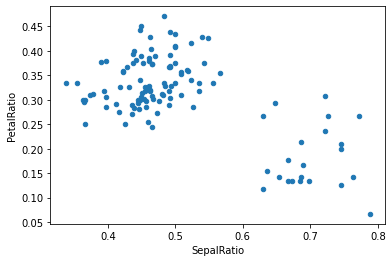

In [ ]:
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that's been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn't have a reference to the *filtered* DataFrame available.

The function signature for `assign` is simply `**kwargs.` The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a `Series` of NumPy array), or a function of one argument to be called on the `DataFrame.` A copy of the original DataFrame is returned, with the new values inserted.

Starting with Python 3.6 the order of `**kwargs` is preserved. This allows for *dependent* assignment, where an expression later in `**kwargs` can refer to a column created earlier in the same `assign().` 

In [ ]:
dfa = pd.DataFrame({"A": [1,2,3], "B": [4,5,6]})
dfa

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [ ]:
dfa.assign(C=lambda x: x.A + x.B)  # assign은 원래 dataframe을 건드리지 않음. x["A"] = x.A는 같음

,A,B,C
0,1,4,5
1,2,5,7
2,3,6,9


In the second expression, x['c'] will refer to the newly created column, that's equal to dfa['A'] + dfa['B']

# Indexing / selection
The basics of indexing are as follows:  


Operation | Syntax | Result 
------------ | -------- | ------ 
Select Column | df[col] | Series |
Select row by label | df.loc[label] | Series |
Select row by integer location | df.iloc[loc] | Series |
Slice rows | df[5:10] | DataFrame |
Select rows by boolean vector | df[bool_vec] | DataFrame |


Row selection, for example, returns a Series whose index is the columns of the DataFrame:

In [ ]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [ ]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

For a more exhaustive(examining, including, or considering all elements or aspects; fully comprehensive) treatment of sophisticated label-based indexing and slicing, see the [section on indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing). We will address the fundamentals of reindexing / conforming to new sets of labels in the [section on reindexing.](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#reindexing-and-altering-labels)

#Data alignment and arithmetic
Data alignment between DataFrame objects automatically align on **both the columns and the index (row labels).** Again, the resulting object will have the union of the column and row labels.


In [ ]:
np.random.randn(10, 4)

array([[ 1.10159948,  1.71433611,  1.20919228, -0.33244553],
       [ 1.48842927,  2.02997646,  0.95904985, -0.32317018],
       [-0.01602836, -1.16577385,  0.48097883,  0.36154378],
       [-0.40944527, -0.21019536,  0.15006943,  1.01853504],
       [ 0.8416139 ,  0.18412107,  0.80590303,  0.82971694],
       [-0.53650292, -0.0834282 , -0.49522058, -0.97724041],
       [-0.01686384, -0.93665091, -0.51102769, -0.34357818],
       [ 3.27766763,  0.47511307, -1.47996884,  1.1438259 ],
       [-0.79883768,  1.36639806,  0.96585081,  1.01270297],
       [ 0.68589122,  0.94133646,  1.09185659, -1.06452545]])

In [ ]:
np.random.randn(7, 3)

array([[-0.96040823, -0.80739333, -0.11886699],
       [-0.69442414, -0.11802477,  1.4796685 ],
       [-0.00922068, -0.62071169,  0.7519607 ],
       [-1.5864746 , -1.03272862, -0.74863442],
       [-0.60270451,  0.7249865 , -0.85136242],
       [ 1.73634958, -0.98679397, -2.87621323],
       [-1.29988585, -0.47098187, -0.39105586]])

In [ ]:
df = pd.DataFrame(np.random.randn(10,4), columns=["A", "B", "C", "D"])
df

,A,B,C,D
0,-0.531367,-0.265807,1.884255,-1.294251
1,0.602977,-0.641712,0.941106,1.479013
2,-1.860744,0.312707,-2.040920,-0.011268
3,1.426948,1.029229,0.362669,1.123623
4,-0.610277,2.466136,-1.492978,-1.341814
5,-0.667039,0.606434,-0.630661,0.464048
6,0.155561,-0.054434,1.812161,-1.453218
7,0.105202,-0.178447,-0.815654,-0.202360
8,0.088244,0.618304,-1.008996,1.017843
9,0.713949,0.511584,-1.658837,2.447903


In [ ]:
df2 = pd.DataFrame(np.random.randn(7,3), columns=["A", "B", "C"])
df2

,A,B,C
0,-0.493368,0.619183,-0.911880
1,-0.636295,-2.057678,1.176318
2,2.035999,-2.046655,0.207829
3,-0.767092,-1.320726,0.342948
4,0.047217,-0.215036,-0.965505
5,-0.998662,0.060293,-0.393627
6,0.595140,-1.486589,0.500678


In [ ]:
df + df2

,A,B,C,D
0,-1.024735,0.353376,0.972374,NaN
1,-0.033318,-2.699389,2.117424,NaN
2,0.175255,-1.733948,-1.833092,NaN
3,0.659856,-0.291498,0.705617,NaN
4,-0.563060,2.251100,-2.458483,NaN
5,-1.665701,0.666727,-1.024288,NaN
6,0.750701,-1.541023,2.312839,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series **index** on the DataFrame **columns**, thus [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) row-wise. For example: 

In [ ]:
df.iloc[0]

A   -0.531367
B   -0.265807
C    1.884255
D   -1.294251
Name: 0, dtype: float64

In [ ]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,1.134343,-0.375905,-0.943149,2.773263
2,-1.329378,0.578513,-3.925175,1.282983
3,1.958315,1.295035,-1.521586,2.417873
4,-0.078911,2.731942,-3.377233,-0.047564
5,-0.135673,0.872240,-2.514916,1.758299
6,0.686927,0.211373,-0.072094,-0.158967
7,0.636569,0.087359,-2.699909,1.091891
8,0.619610,0.884110,-2.893251,2.312093
9,1.245316,0.777391,-3.543092,3.742154


For explicit control over the matching and broadcasting behavior, see the section on [flexible binary operations.](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#flexible-binary-operations)

Operations with scalars are just as you would expect:

In [ ]:
df * 5 + 2

,A,B,C,D
0,-0.656833,0.670967,11.421274,-4.471253
1,5.014883,-1.208558,6.705530,9.395063
2,-7.303721,3.563534,-8.204602,1.943662
3,9.134740,7.146143,3.813345,7.618113
4,-1.051387,14.330680,-5.464889,-4.709072
5,-1.335196,5.032168,-1.153307,4.320240
6,2.777803,1.727831,11.060804,-5.266090
7,2.526012,1.107763,-2.078269,0.988202
8,2.441218,5.091519,-3.044982,7.089214
9,5.569746,4.557920,-6.294184,14.239515


In [ ]:
1 /df

,A,B,C,D
0,-1.881940,-3.762135,0.530714,-0.772648
1,1.658439,-1.558332,1.062580,0.676127
2,-0.537419,3.197884,-0.489975,-88.750335
3,0.700796,0.971601,2.757335,0.889979
4,-1.638599,0.405493,-0.669802,-0.745260
5,-1.499162,1.648985,-1.585637,2.154949
6,6.428361,-18.370946,0.551827,-0.688128
7,9.505490,-5.603894,-1.226010,-4.941698
8,11.332258,1.617328,-0.991084,0.982470
9,1.400660,1.954713,-0.602832,0.408513


In [ ]:
df ** 4

,A,B,C,D
0,0.079722,0.004992,12.605452,2.805909e+00
1,0.132191,0.169574,0.784430,4.785061e+00
2,11.987999,0.009562,17.350191,1.611833e-08
3,4.146032,1.122141,0.017300,1.593976e+00
4,0.138710,36.988613,4.968364,3.241678e+00
5,0.197973,0.135249,0.158192,4.637157e-02
6,0.000586,0.000009,10.784177,4.459879e+00
7,0.000122,0.001014,0.442612,1.676853e-03
8,0.000061,0.146153,1.036474,1.073304e+00
9,0.259818,0.068496,7.572072,3.590681e+01


Boolean operators work as well:

In [ ]:
df1 = pd.DataFrame({"a": [1,0,1], "b": [0, 1, 1]}, dtype=bool)
df1

,a,b
0,True,False
1,False,True
2,True,True


In [ ]:
df2 = pd.DataFrame({"a": [0,1, 1], "b": [1, 1, 0]}, dtype=bool)
df2

,a,b
0,False,True
1,True,True
2,True,False


In [ ]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [ ]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [ ]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [ ]:
-df1  # 결과 반대로 나옴 (T -> F, F -> T)

,a,b
0,False,True
1,True,False
2,False,False


#Transposing 
To transpose, access the `T` attribute (also the `transpose` function), similar to an ndarray:

In [ ]:
# only show the first 5 rows
df[:5].T

,0,1,2,3,4
A,-0.531367,0.602977,-1.860744,1.426948,-0.610277
B,-0.265807,-0.641712,0.312707,1.029229,2.466136
C,1.884255,0.941106,-2.040920,0.362669,-1.492978
D,-1.294251,1.479013,-0.011268,1.123623,-1.341814


#DataFrame interoperability with NumPy functions
Elementwise NumPy ufuncs (log, exp, sqrt, ...) and various other NumPy functions can be used with no issues on Series and DataFrame, assuming the data within are numeric:

In [ ]:
np.exp(df)

,A,B,C,D
0,0.587801,0.766587,6.581448,0.274103
1,1.827551,0.526391,2.562814,4.388610
2,0.155557,1.367121,0.129909,0.988796
3,4.165965,2.798906,1.437160,3.075977
4,0.543200,11.776852,0.224703,0.261371
5,0.513226,1.833879,0.532240,1.590499
6,1.168313,0.947021,6.123666,0.233817
7,1.110935,0.836568,0.442350,0.816801
8,1.092254,1.855778,0.364585,2.767219
9,2.042040,1.667931,0.190360,11.564072


In [ ]:
np.asarray(df)

array([[-0.53136658, -0.26580653,  1.88425471, -1.29425066],
       [ 0.60297667, -0.64171159,  0.94110595,  1.47901262],
       [-1.86074422,  0.31270679, -2.0409204 , -0.01126756],
       [ 1.42694803,  1.02922869,  0.36266899,  1.12362251],
       [-0.61027742,  2.46613594, -1.49297779, -1.34181445],
       [-0.66703911,  0.60643359, -0.63066134,  0.46404805],
       [ 0.15556066, -0.05443378,  1.8121609 , -1.45321797],
       [ 0.10520236, -0.17844734, -0.81565387, -0.20235958],
       [ 0.08824367,  0.61830383, -1.00899648,  1.01784273],
       [ 0.71394922,  0.51158409, -1.65883686,  2.44790305]])

DataFrame is not intended to be a drop-inreplacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array. 

`Series` implements `__array_ufunc__`, which allows it to work with NumPy's [universal functions.](https://numpy.org/doc/stable/reference/ufuncs.html)

The ufunc is applied to the underlying array in a Series.

In [ ]:
ser = pd.Series([1,2,3,4])

In [ ]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

> 🙌 ***Changed in version 0.25.0:*** When multiple `Series` are passed to a ufunc, they are aligned before performing the operation.

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using `numpy.remainder()` on two `Series` with differently ordered labels will align before the operation. 

In [ ]:
ser1 = pd.Series([1,2,3], index=["a", "b", "c"])
ser2 = pd.Series([1,3,5], index=["b", "a", "c"])

In [ ]:
ser1

a    1
b    2
c    3
dtype: int64

In [ ]:
ser2

b    1
a    3
c    5
dtype: int64

In [ ]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [ ]:
ser3 = pd.Series([2,4,6], index=["b", "c", "d"])
ser3

b    2
c    4
d    6
dtype: int64

In [ ]:
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

When a binary ufunc is applied to a `Series` and `Index`, the Series implementation takes precedene(먼저, 우선순위) and a Series is returned. 

In [ ]:
ser = pd.Series([1,2,3])
ser

0    1
1    2
2    3
dtype: int64

In [ ]:
idx = pd.Index([4,5,6])
idx

Int64Index([4, 5, 6], dtype='int64')

In [ ]:
np.maximum(ser, idx)  # Series 형태로 반환한다는 뜻

0    4
1    5
2    6
dtype: int64

Numpy ufuncs are safe to apply to `Series` backed by non-ndarray arrays, for example `arrays.SparseArray` (see Sparse calculation). If possible, the ufunc is applied without converting the underlying data to an ndarray.

#Console display
Very large DataFrames will be truncated to display them in the console. You can also get a summary using `info()`. (Here I am reading a CSV version of the **baseball** dataset from the **plyr** R package):

In [ ]:
baseball = pd.read_csv("/content/drive/MyDrive/Kaggle/data/baseball.csv")
baseball

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,89525,benitar01,2007,2,FLO,NL,34,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
96,89526,benitar01,2007,1,SFN,NL,19,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
97,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0


In [ ]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   player  100 non-null    object 
 2   year    100 non-null    int64  
 3   stint   100 non-null    int64  
 4   team    100 non-null    object 
 5   lg      100 non-null    object 
 6   g       100 non-null    int64  
 7   ab      100 non-null    int64  
 8   r       100 non-null    int64  
 9   h       100 non-null    int64  
 10  X2b     100 non-null    int64  
 11  X3b     100 non-null    int64  
 12  hr      100 non-null    int64  
 13  rbi     100 non-null    float64
 14  sb      100 non-null    float64
 15  cs      100 non-null    float64
 16  bb      100 non-null    int64  
 17  so      100 non-null    float64
 18  ibb     100 non-null    float64
 19  hbp     100 non-null    float64
 20  sh      100 non-null    float64
 21  sf      100 non-null    float64
 22  gid

However, using `to_string` will return a string representation of the DataFrame in tabular form, though it won't always fit the console width: 

In [ ]:
print(baseball.iloc[-20:, :12].to_string())  # print 꼭 해줘야 행,열 맞춰서 나오네? 행:뒤에서부터 -20인 시점~끝, 열: 앞에서부터 ~13번째꺼까지 

       id     player  year  stint team  lg    g   ab   r    h  X2b  X3b
80  89474  finlest01  2007      1  COL  NL   43   94   9   17    3    0
81  89480  embreal01  2007      1  OAK  AL    4    0   0    0    0    0
82  89481  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2
83  89482  easleda01  2007      1  NYN  NL   76  193  24   54    6    0
84  89489  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0
85  89493  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0
86  89494  coninje01  2007      2  NYN  NL   21   41   2    8    2    0
87  89495  coninje01  2007      1  CIN  NL   80  215  23   57   11    1
88  89497  clemero02  2007      1  NYA  AL    2    2   0    1    0    0
89  89498  claytro01  2007      2  BOS  AL    8    6   1    0    0    0
90  89499  claytro01  2007      1  TOR  AL   69  189  23   48   14    0
91  89501  cirilje01  2007      2  ARI  NL   28   40   6    8    4    0
92  89502  cirilje01  2007      1  MIN  AL   50  153  18   40   

Wide DataFrames will be printed across multiple rows by default:

In [ ]:
pd.DataFrame(np.random.randn(3,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.448626,0.802463,-0.471905,-0.522027,1.655773,1.067777,-0.648939,0.619262,0.720851,-0.167418,-0.432995,0.102803
1,0.614042,0.560110,0.429511,0.751511,-0.877129,-0.062447,-1.557306,0.611844,1.986877,0.384182,0.833993,-1.667824
2,-2.129125,-0.932619,-0.865135,1.527752,0.739638,0.759067,1.058000,1.009959,-0.071387,0.805010,0.479700,0.661827


You can change how much to print on a single row by setting the `display.width` option:

In [ ]:
pd.set_option("display.width", 40) # default is 80
pd.DataFrame(np.random.randn(3,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.223922,1.041919,-0.703029,0.143055,-0.903873,0.698585,1.069542,0.040222,0.764410,1.395941,-0.646205,-0.738035
1,1.545787,-1.318590,-0.841379,-1.081921,-0.902955,-0.795644,1.507613,-1.763199,-0.343727,0.934426,-0.035231,0.567195
2,-1.848862,-0.982608,0.482525,-0.882868,0.652611,-0.008201,0.032747,0.493423,-0.205040,-0.530781,-0.522504,0.139643


You can adjust the max width of the individual columns by setting `display.max_colwidth`

In [ ]:
datafile = {
    "filename": ["filename_01", "filename_02"],
    "path": [
             "media/user_name/storage/folder_01/filename_01",
             "media/user_name/storage/folder_02/filename_02",
    ],
}

pd.set_option("display.max_colwidth", 30)

In [ ]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [ ]:
pd.set_option("display.max_colwidth", 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


You can also disable this feature via the `expand_frame_repr` option. This will print the table in one block.

#DataFrame column attribute access and IPython completion
If a DataFrame column label is a valid Python variable name, the column can be accessed like an attribute:


In [ ]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,-0.614234,0.643273
1,-0.278663,1.904187
2,-0.667548,0.007766
3,-0.340219,-0.976510
4,1.876490,0.653870


In [ ]:
df.foo1

0   -0.614234
1   -0.278663
2   -0.667548
3   -0.340219
4    1.876490
Name: foo1, dtype: float64

The columns are also connected to the IPython completion mechanism so they can be tab-completed:

In [ ]:
df.foo<TAB> # noqa: E225, E999